### Vivek Dadhich

### 20MAI0077

### Repository-link: 

### Task 2 -> Implement perceptron/backpropagation on a publically available dataset using buitin functions
<br /><br />

In [2]:
from sklearn import datasets 
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()

In [4]:
x = iris.data[:, [2,3]]
y = iris.target

In [5]:
print ('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [6]:
# splitting data into test and train data set
from sklearn.model_selection import train_test_split


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1, stratify = y)


In [8]:
print ('Lables count in y:', np.bincount(y))
print('Lables counts in y_train:', np.bincount(y_train))
print('Lables counts in y_test:', np.bincount(y_test))

Lables count in y: [50 50 50]
Lables counts in y_train: [35 35 35]
Lables counts in y_test: [15 15 15]


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [10]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter = 40, eta0=0.1, random_state=1)
ppn.fit(x_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [11]:
y_pred = ppn.predict(x_test_std)


In [12]:
print('Misclassified samples: %d' %(y_test !=y_pred).sum())

Misclassified samples: 1


In [13]:
from sklearn.metrics import accuracy_score
print("Accuracy:%.2f" %accuracy_score(y_test, y_pred))

Accuracy:0.98


In [14]:
print("Accuracy:%.2f" %ppn.score(x_test_std, y_test))

Accuracy:0.98


In [22]:
def plot_decision_regions(x,y, classifier, test_idx=None, resolution=0.02):
    markers = ('s','x','o','^','v')
    colors =('red','blue','green','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = x[:, 0].min() -1, x[:,0].max()+1
    x2_min, x2_max = x[:, 1].min() -1, x[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl,0], y = x[y==cl, 1], alpha=0.8, c=colors[idx],marker = markers[idx],label = cl, edgecolor='black')
    
    if test_idx:
        x_test, y_test = x[test_idx,:], y[test_idx]
        plt.scatter(x_test[:,0], x_test[:,1], c="", edgecolor="black", marker='o', s=100, label="test set")

<ipython-input-22-65af18166cfc>:19: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(x_test[:,0], x_test[:,1], c="", edgecolor="black", marker='o', s=100, label="test set")


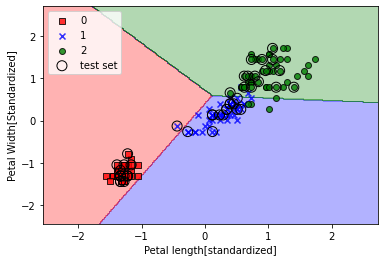

In [23]:
x_combined_std = np.vstack((x_train_std,x_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(x=x_combined_std, y= y_combined, classifier=ppn, test_idx= range(105,150))
plt.xlabel('Petal length[standardized]')
plt.ylabel('Petal Width[Standardized]')
plt.legend(loc='upper left')
plt.show()